- Use the model to predict how many people are attacked per lunar day when the moon's brightness is 0 (completely dark).

np.float64(11.651313541064175)

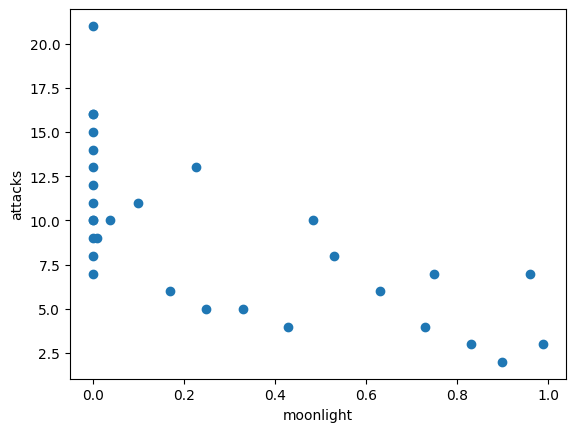

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('lion-attacks-lunar-cycle.csv')

# Creating class for the model prediction
class LinearModel():
    def __init__(self, model_name=""):
        self.model_name = model_name

    def fit(self, x, y):
        x = pd.DataFrame(x)
        linear_model = LinearRegression().fit(x,y)
        y_pred = linear_model.predict(x)
        self.slope = linear_model.coef_[0]
        self.intercept = linear_model.intercept_
    
    def predict(self, x):
        return self.slope * x + self.intercept

# Plot
plt.scatter(df['evening_moonlight'], df['attacks'])
plt.ylabel('attacks')
plt.xlabel('moonlight')


# Prediction of attack number when the moonlight is 0
moonlight = LinearModel('moonlight_model')
moonlight.fit(x=df['evening_moonlight'], y=df['attacks'])
moonlight.predict(x=0)

- What about when the moon's brightness is 1 (fully illuminated)?

In [14]:
print(f'When the moonlight is at its brightness, the predicted nummber of attacks is : {round(moonlight.predict(x=1), 2)}.')

When the moonlight is at its brightness, the predicted nummber of attacks is : 2.74.


- By what percentage do lion attacks decrease as evening moonlight increases from 0 to 1?

In [24]:
no_light = moonlight.predict(x=0)
bright_night = moonlight.predict(x=1)
decrease_percentage = ((no_light - bright_night) / no_light) * 100
print(decrease_percentage)

76.51609823306285
